<br>
<font>
<div dir="ltr" align="center">
    <img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width="150" height="150">
    <br>
    <font color="#E74C3C" size="7" style="font-family:Arial, sans-serif;">
        Linear Algebra <br>
    </font>
    <font color="#2980B9" size="5" style="font-family:Arial, sans-serif;">
        DR Rabiee - DR Ramezani <br>
    </font>
    <font color="#2980B9" size="5" style="font-family:Arial, sans-serif;">
        Computer Engineering Department <br>
    </font>
    <font color="#1ABC9C" size="5" style="font-family:Arial, sans-serif;">
        Fall 2024 <br>
    </font>
    <font color="#16A085" size="5" style="font-family:Arial, sans-serif;">
        Practical Assignment 0 <br>
    </font>
    <font color="#7F8C8D" size="4" style="font-family:Arial, sans-serif;">
        Ali Bakhtiari - Armin Khosravi - Ali Najar
    </font>
</div>


<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
گل‌های زنبق
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این تمرین، قصد داریم یک الگوریتم طبقه‌بندی داده‌ها را پیاده‌سازی کنیم. هدف از این تمرین، مرور مفاهیمی همچون محاسبات برداری، استفاده از توابع تجمیعی و عمومی کتابخانه نامپای، و بهره‌گیری از آرایه‌ها برای نمایه‌سازی است. ابتدا الگوریتم را گام به گام پیاده‌سازی کنید و در نهایت متوجه خواهید شد که این الگوریتم به یکی از روش‌های رایج یادگیری ماشین نزدیک است.
</font>
</p>

In [4]:
import numpy as np
from numpy.ma.core import shape
from zmq.backend.cffi.socket import new_pointer_from_opt

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مجموعه‌داده
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این تمرین یک مجموعه‌داده‌ی معروف به نام <a href="https://en.wikipedia.org/wiki/Iris_flower_data_set" target="_blank" style="color:#0099cc">Iris Flower</a> (گل‌های زنبق) در اختیارتان قرار گرفته که شامل مشخصات ۱۵۰ گل زنبق است. هرکدام از این گل‌ها به یکی از سه نوع زنبق نوک‌زبر (Iris setosa)، زنبق رنگارنگ (Iris versicolor) و زنبق ویرجینیا (Iris virginica) تعلق دارد. همچنین مشخصات هر گل شامل طول و عرض کاسبرگ (sepal) و گلبرگ (petal) است. با استفاده از این مشخصات، می‌توانیم هر گل را به صورت یک نقطه در فضایی چهاربعدی تصور کنیم که این چهار کمیت، مختصات آن نقطه را تعیین می‌کنند. 
</font>
</p>


<center>
<div style="max-width: 900px">
<img src="img/iris_types.jpg">
</div>
</center>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
مشخصات ۱۲۰ گل زنبق در فایلی به‌نام <code>irises.npy</code> ذخیره شده است. هنگامی‌که این فایل خوانده شود، یک آرایه‌ی ۱۲۰ در ۴ همانند شکل زیر ساخته می‌شود که هر سطر آن، مشخصات یک گل (طول کاسبرگ، عرض کاسبرگ، طول گلبرگ و عرض گلبرگ به سانتی‌متر) را نشان می‌دهد.
</font>
</p>

<center>
<div style="max-width: 700px">
<img src="img/fig_irises.png">
</div>
</center>

In [5]:
irises = np.load('irises.npy')
print(irises.shape)

(120, 4)



<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
از طرفی نوع این گل‌ها (نوک‌زبر، رنگارنگ یا ویرجینیا) به‌صورت عددی در فایل دیگری به نام <code>types.npy</code> ذخیره شده است. مقادیر این آرایه به‌صورت <code>0</code>، <code>1</code> یا <code>2</code> است که به‌ترتیب بیان‌گر نوع زنبق نوک‌زبر، زنبق رنگارنگ و زنبق ویرجینیا هستند.
</font>
</p>

In [6]:
types = np.load('types.npy')
print(types.shape)

(120,)


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در یادگیری ماشین، داده‌ها به دو دسته اصلی تقسیم می‌شوند: <b style="color:#0099cc">داده‌های آموزشی (train)</b> و <b style="color:#0099cc">داده‌های آزمون (test)</b>.
<br><br>
داده‌های آموزشی شامل مجموعه‌ای از نمونه‌ها هستند که هر نمونه دارای دو بخش است: <b>ویژگی‌ها</b> و <b>برچسب</b>. ویژگی‌ها اطلاعاتی هستند که توصیف‌کننده هر نمونه‌اند. برای مثال، در مورد گل‌های زنبق، این ویژگی‌ها شامل اندازه‌های طول و عرض گلبرگ‌ها و کاسبرگ‌ها می‌شود. 
<br><br>
از سوی دیگر، <b>برچسب</b> مشخص می‌کند که هر نمونه به کدام دسته تعلق دارد. در مثال گل‌های زنبق، برچسب‌ها می‌توانند نوع گل‌ها باشند (مثلاً «ستوزا»، «ویرجینیکا» یا «ورسیکالر»). هدف از یادگیری ماشین، آموزش الگوریتم برای پیدا کردن رابطه بین ویژگی‌ها و برچسب‌ها است تا بتواند در آینده برچسب‌های نمونه‌های جدید را پیش‌بینی کند.
<br><br>
زمانی که الگوریتم با داده‌های آموزشی آموزش دید، از <b>داده‌های آزمون</b> استفاده می‌شود تا عملکرد آن در پیش‌بینی نمونه‌های جدید ارزیابی شود. داده‌های آزمون شامل نمونه‌هایی هستند که ویژگی‌هایشان مشخص است، اما برچسب آن‌ها به مدل داده نمی‌شود. هدف الگوریتم این است که با استفاده از دانشی که از داده‌های آموزشی کسب کرده، برچسب‌های این نمونه‌ها را پیش‌بینی کند.
<br><br>
در این تمرین، وظیفه شما پیاده‌سازی الگوریتمی است که با دریافت ویژگی‌های مربوط به یک گل زنبق، نوع آن را پیش‌بینی کند. این پیش‌بینی بر اساس داده‌هایی انجام خواهد شد که برچسب‌های آن‌ها از قبل مشخص است و به آن‌ها <b style="color:#0099cc">داده‌های آموزشی</b> می‌گوییم.
<br><br>
مشخصات ۳۰ گل زنبق دیگر که نوع آن‌ها نامشخص است و باید با الگوریتم شما پیش‌بینی شود، در فایلی با نام <code>new_irises.npz</code> ذخیره شده است. این فایل یک آرایه ۳۰ در ۴ را شامل می‌شود که هر سطر آن ویژگی‌های یک گل را نمایش می‌دهد. این نمونه‌ها را <b style="color:#0099cc">داده‌های آزمون</b> می‌نامیم و هدف شما این است که نوع آن‌ها را با استفاده از داده‌های آموزشی پیش‌بینی کنید.
</font>
</p>

<center>
<div style="max-width: 700px">
<img src="img/fig_new_irises.png">
</div>
</center>


In [7]:
new_irises = np.load('new_irises.npy')
print(new_irises.shape)

(30, 4)


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
تاکنون با موفقیت تمام فایل‌های مجموعه‌داده را خواندیم. اکنون تعداد نمونه‌های آموزشی را <code>n</code> و تعداد نمونه‌های آزمون را <code>m</code> بنامیم و در متغیرهایی به همین نام ذخیره کنیم.
</font>
</p>

In [8]:
n, m = len(irises), len(new_irises)
print("Number of training samples (n):", n)
print("Number of test samples (m):", m)

Number of training samples (n): 120
Number of test samples (m): 30


<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
تشخیص نوع گل با مقایسه با نمونه‌های دیگر
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
فرض کنید مشخصات یک گل زنبق جدید به شما داده شده و قصد دارید نوع آن را تشخیص دهید. ممکن است اولین ایده‌ای که به ذهن‌تان خطور کند این باشد که شباهت آن را با گل‌هایی که نوع‌شان از قبل مشخص است مقایسه کنید. سپس براساس بیشترین شباهت، نوع گل جدید را پیش‌بینی کنید. حال تصور کنید ۳ گل را که بیشترین شباهت به گل جدید دارند پیدا کرده‌اید. اگر از این ۳ گل، ۲ گل از نوع «ویرجینیا» باشند و ۱ گل از نوع «نوک‌زبر»، منطقی است که بر اساس رای اکثریت، نتیجه‌گیری کنیم که احتمالاً گل جدید هم از نوع «ویرجینیا» است.
<br><br>
این روش ساده و شهودی به شما کمک می‌کند نوع گل را پیش‌بینی کنید. البته به‌جای بررسی شباهت، می‌توانیم فاصله بین ویژگی‌های گل جدید و سایر گل‌های موجود را محاسبه کنیم تا نمونه‌هایی که به گل جدید نزدیک‌تر هستند را بیابیم. روش کلی به این صورت است:

<ol dir=rtl>
<li>ابتدا فاصله بین مشخصات گل جدید از   (که قصد داریم نوع آن را پیش‌بینی کنیم) و تمامی نمونه‌های موجود از  (که نوع آن‌ها را می‌دانیم) را محاسبه می‌کنیم و نمونه آزمون را با نمونه‌های آموزشی می‌سنجیم.</li>
<li>سپس <code>k</code> نزدیک‌ترین نمونه به گل جدید را که کمترین فاصله را با آن دارند، پیدا می‌کنیم. عدد <code>k</code> یک هایپرپارامتر است که تعداد نزدیک‌ترین همسایه‌ها را تعیین می‌کند و به ما کمک می‌کند تا بدانیم که در پیش‌بینی باید به چند نمونه نزدیک توجه کنیم.</li>
<li>حال بررسی می‌کنیم که این <code>k</code> نمونه‌های نزدیک‌تر بیشتر از کدام نوع بوده‌اند و همان نوع را به‌عنوان پیش‌بینی خود اعلام می‌کنیم.</li>
</ol>
<br>

</font>
</p>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    <b> توجه: </b>
هایپرپارامترها مقادیر تنظیمی هستند که قبل از آموزش مدل باید تعیین شوند و تأثیر زیادی بر عملکرد مدل دارند. انتخاب مناسب هایپرپارامترها می‌تواند به بهبود دقت پیش‌بینی کمک کند.</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
اکنون می‌خواهیم این روش را به کمک کتابخانه نامپای گام به گام پیاده‌سازی کنیم.
</font>
</p>


<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قسمت ۱: محاسبه‌ی فاصله‌ها
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در ابتدا قصد داریم تابعی بنویسیم که فاصله‌ی هرکدام از نمونه‌ها/ردیف‌های یک آرایه همچون <code>new_points</code> را با هرکدام از نمونه‌ها/ردیف‌های آرایه‌ی دیگر همچون <code>points</code> محاسبه کند. به‌عنوان مثال در این تمرین اگر ما ۱۲۰ نمونه‌ی آموزشی و ۳۰ نمونه‌ی آزمون داریم، باید فاصله‌ی هرکدام از نمونه‌های آزمون با هرکدام از نمونه‌های آموزشی را محاسبه کنیم، بنابراین خروجی ما دارای ابعاد ۳۰ در ۱۲۰ خواهد بود. به‌عنوان مثال ردیف اول این ماتریس که در شکل سمت راست زیر نشان داده شده،‌ فاصله‌ی نمونه‌ی آزمون اول را با هرکدام از نمونه‌های آموزشی شامل می‌شود.
</font>
</p>

<center>
<div style="max-width: 1000px">
<img src="img/fig.png">
</div>
</center>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
برای محاسبه‌ی فاصله‌ی بین دو نقطه‌ی <code>p</code> و <code>q</code> با <code>f</code> ویژگی، از رابطه‌ی زیر استفاده خواهیم کرد:
</font>
</p>

$$ d(p,q) = {\sum_{i=0}^{f-1} (p_i - q_i)^2} $$

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در تمرین ما،‌ <code>f</code> برابر با <code>4</code> است. یعنی برای محاسبه‌ی فاصله‌ی بین دو نمونه کافیست عرض کاسبرگ آن‌ها را از هم کم کرده و به توان ۲ برسانیم، سپس  برای طول کاسبرگ،‌ عرض گلبرگ و طول گلبرگ نیز همین کار را انجام داده و حاصل به‌دست‌آمده برای هر چهار ویژگی را با هم جمع کنیم. 
برای محاسبه‌ی فاصله‌ی بین اجزای دو آرایه روش‌های مختلفی وجود دارد که ۳ رویکرد مختلف را آزمایش خواهیم کرد.
</font>
</p>

<h3 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
روش دو حلقه‌ای
</font>
</h3>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ابتدا می‌خواهیم این کار را به‌سادگی و به کمک دو حلقه (<code>for</code>) انجام دهیم. یعنی در این روش یک حلقه روی نمونه‌های آزمون می‌نویسیم و داخل آن یک حلقه روی نمونه‌های آموزشی می‌نویسیم تا به ازای هر نمونه‌ی آزمون،‌ مقدار فاصله با هرکدام از نمونه‌های آموزشی محاسبه شود.
<br>
در تابع زیر کافیست عبارتی را جلوی علامت مساوی (به‌جای <code>None</code>) قرار دهید که فاصله‌ی بین دو نقطه‌ی <code>new_points[i]</code> و <code>points[j]</code> را به کمک فرمول بالا محاسبه کند.
<br>

</font>
</p>

In [49]:

def calc_two_loops(new_points, points):
    # Initialize a distance matrix
    dd = np.zeros((len(new_points), len(points)))  # Create a 2D in NumPy array

    for i, new_row in enumerate(new_points):
        for j, row in enumerate(points):
            dif0 = (new_row[0] - row[0]) ** 2
            dif1 = (new_row[1] - row[1]) ** 2
            dif2 = (new_row[2] - row[2]) ** 2
            dif3 = (new_row[3] - row[3]) ** 2
            dd[i][j] = dif0 + dif1 + dif2 + dif3
            
    return dd

In [56]:
d2 = calc_two_loops(new_irises, irises)
print(d2.shape)

(30, 120)


<h3 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
روش تک حلقه‌ای
</font>
</h3>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
اکنون می‌خواهیم از خاصیت پخش یا بازآرایی آرایه‌ها استفاده کرده و به‌ترتیب هرکدام از حلقه‌ها را حذف کنیم. در این قسمت می‌خواهیم به کمک خاصیت پخش آرایه، حلقه‌ی داخلی را حذف کرده و فاصله‌ی هر نمونه‌ی آزمون را به‌صورت همزمان با همه‌ی نمونه‌های آموزشی محاسبه کنیم. پس در تابع زیر، این‌بار جلوی علامت مساوی (به‌جای <code>None</code>) عبارتی را قرار دهید که فاصله‌ی همه‌ی نمونه‌های آموزشی با نمونه‌ی آزمون <code>new_points[i]</code> را محاسبه کند.
<br>

</font>
</p>

In [52]:
def calc_one_loop(new_points, points):
    # Convert input lists to NumPy arrays
    new_points_array = np.array(new_points)
    points_array = np.array(points)

    # Calculate distances using broadcasting
    diffs = new_points_array[:, np.newaxis, :] - points_array[np.newaxis, :, :]
    dd = np.sum(diffs ** 2, axis=2)  # Sum squared differences along the last axis

    return dd


In [53]:
d1 = calc_one_loop(new_irises, irises)
print(d1.shape)

(30, 120)


<h3 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
روش بدون حلقه
</font>
</h3>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
این‌بار باز هم از خاصیت‌های آرایه‌ها استفاده کرده و در تابع زیر جلوی <code>return</code> تنها یک خط کد بنویسید که کل فاصله‌ها را خروجی دهد.
<br>
ممکن است ساختن آرایه‌ی فاصله‌ها بدون حلقه، پیچیده به نظر برسد. اما استفاده از توابع نامپای به جای استفاده از حلقه، هم باعث سریع‌تر شدن کد و هم کوتاه‌تر شدن آن می‌شود و خوب است به آن عادت کنید. سریع‌تر شدن کد را می‌توانید با ورودی دادن آرایه‌های بزرگ آزمایش کنید.
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>

</font>
</p>

In [54]:
def calc_no_loop(new_points, points):
    # Convert input lists to NumPy arrays
    new_points_array = np.array(new_points)
    points_array = np.array(points)

    # Return the distance matrix using broadcasting and vectorized operations
    return np.sum((new_points_array[:, np.newaxis, :] - points_array[np.newaxis, :, :]) ** 2, axis=2)

In [55]:
d = calc_no_loop(new_irises, irises)
print(d.shape)

(30, 120)


<h3 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
بررسی
🧐
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
محاسبه‌ی آرایه فاصله‌ها به سه روش فوق، نباید تفاوتی در نتیجه حاصل کند. از این رو کد زیر را اجرا کنید تا از برابر بودن خروجی سه تابع فوق اطمینان حاصل کنید. از این به بعد از آرایه‌ی ‍<code>d</code> به عنوان آرایه‌ی فاصله‌ها استفاده می‌کنیم.
</font>
</p>

In [57]:
if np.allclose(d, d1, 1e-5) and np.allclose(d, d2, 1e-5) and np.allclose(d1, d2, 1e-5):
    print('Fine!')
else:
    print('There is something wrong!')

Fine!


<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قسمت ۲: پیدا کردن <code>k</code> نزدیک‌ترین همسایه
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    به کمک توابع پیاده‌سازی شده توانستیم فاصله‌ی هر نمونه‌ی آزمون با هرکدام از نمونه‌های آموزشی را محاسبه کنیم و حاصل را در <code>d</code> ذخیره کردیم.
    یعنی فاصله‌ی نمونه‌ی آزمون <code>new_irises[i]</code> با نمونه‌ی آموزشی <code>irises[j]</code> را در درایه‌ی <code>d[i][j]</code> ذخیره کرده‌ایم. اکنون نیاز است به‌ازای هر نمونه‌ی آزمون، <code>k</code> نمونه‌ی آموزشی با کمترین فاصله به آن را پیدا کنیم. توجه داشته باشید که باید شماره‌ی نزدیک‌ترین نمونه‌ها را ذخیره کنیم، نه خود مقدار فاصله را. در اینجا <code>k</code> را برابر <code>10</code> در نظر بگیرید، بنابراین آرایه‌ی خروجی <code>k_nearest</code> یک ماتریس با ابعاد <code dir=ltr>(30, 10)</code> خواهد بود.
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    <b style="color:green">راهنمایی:</b>
    به منظور پیدا کردن نزدیک‌ترین همسایگان (کم‌ترین فاصله‌ها) از <code>np.argpartition</code> استفاده کنید.
    تفاوت <code>argpartition</code> با <code>partition</code> همچون تفاوت <code>argsort</code> با <code>sort</code> است. یعنی این تابع، شماره (اندیس) عناصر مرتب‌شده را خروجی می‌دهد و نه مقدار آن‌ها را.
</font>
</p>

In [59]:

def find_k_nearest_neighbors(new_points, points, k):
    # Calculate the distance matrix
    d = calc_no_loop(new_points, points)
    
    # Initialize an array to hold the indices of the k nearest neighbors
    k_nearest = np.zeros((d.shape[0], k), dtype=int)

    # Find the indices of the k nearest neighbors for each test sample
    for i in range(d.shape[0]):
        k_nearest[i] = np.argpartition(d[i], k)[:k]  # Get the indices of the k smallest distances

    return k_nearest


In [66]:
k = 10
k_nearest = find_k_nearest_neighbors(new_irises,irises,k)
print(k_nearest)    

[[  0  14  32   6  22  17  23  37  39  21]
 [ 30   1  24  10  20  36   2   3   6  28]
 [ 27  13  12  15   8  29  39   4  26  25]
 [ 17  37  39  14   0  22   8  32  26  13]
 [  9  21  24   6  19  30  20   3  35   5]
 [ 24   3   9  38  30   2  36   5  10   1]
 [ 30   1  24  10  20  36   2   3   6  28]
 [  6   0  23  22  14  21  32   9  17  39]
 [ 37   4  17  35  39  21  22  19   8  16]
 [  6  28   0  23  14  32  30  21  22   9]
 [ 47  60  61  69  52  41  51  73 101  58]
 [ 43  64  71  65  77  72  66  74  76  54]
 [ 66  71  74  64  65  77  76  54  57  49]
 [ 64  65  74  66  43  54  50  72  77  71]
 [ 78  60  47  52  41  57  73  63  51  59]
 [ 65  64  66  74  54  43  50  57  71  75]
 [ 53  44  77  71  76  72  49  63  56  97]
 [ 43  64  74  66  72  65  54  77  71  76]
 [ 77  72  71  74  44  76  54  66  43  53]
 [ 77  71  76  66  74  54  49  44  57  72]
 [106 103 112 115  90  96  93  83  80 110]
 [115  96  82 108 100  94 112 105  80  84]
 [ 97  81 114  91 102 111  92 117 101  56]
 [ 58  67  

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قسمت ۳: پیدا کردن نوع <code>k</code> نزدیک‌ترین همسایه
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    اکنون اندیس نزدیک‌ترین همسایه‌ها (نمونه‌های آموزشی) برای هر نمونه‌ی آزمون را در آرایه‌ی <code>k_nearest</code> داریم. اما ما به دنبال نوع هرکدام از آن‌ها هستیم. برای آن‌که به‌جای هرکدام از اندیس‌ها،‌ نوع آن گل را جایگزین کنید می‌توانید از آرایه‌ی <code>types</code> استفاده کنید. این کار را در یک خط انجام داده و متغیر ‌<code>k_nearest_types</code> را مقداردهی کنید.
</font>
</p>

In [67]:
k_nearest_types = types[k_nearest]
k_nearest_types

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 2, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 2],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 1],
       [1, 1, 1, 2, 2, 2, 2, 2, 2, 1],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2,

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قسمت ۴: تعیین نوع گل‌های جدید
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    در نهایت، باید یک آرایه به نام <code>predicted_types</code> و به طول <code>m</code> بسازیم که در خانه‌ی <code>predicted_types[i]</code>، پرتکرارترین شناسه در <code>k_nearest_types[i]</code> به عنوان شناسه نوع پیش‌بینی شده برای <code>new_irises[i]</code> قرار می‌گیرد.
    <br>
    از آنجا که نامپای مستقیماً‌ تابع مُد (<code>mode</code>) ندارد، این کار را به کمک تابع <code>mode</code> که داخل کتابخانه‌ی <code>scipy</code> قرار دارد، انجام داده‌ایم.
</font>
</p>

In [68]:
from scipy import stats
predicted_types = stats.mode(k_nearest_types, axis=1).mode.reshape(m)
predicted_types

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این قسمت، آرایه‌ی <code>new_types</code> بارگیری شده است که حاوی جواب‌های درست است. از روی آن، دقت دسته‌بندی‌ را محاسبه و در متغیر <code>accuracy</code> ذخیره کنید. دقت دسته‌بندی برابر با تعداد پیش‌بینی‌های درست تقسیم بر تعداد نمونه‌های آزمون است. اگر مراحل کار را درست انجام داده باشید، دقت باید برابر ۱ باشد (یعنی دسته‌بند نوع تمام گل‌های آزمون را درست پیش‌بینی کرده است).
</font>
</p>

In [69]:
new_types = np.load('new_types.npy')
correct_predictions = np.sum(predicted_types == new_types)

accuracy = correct_predictions/len(new_types)
print('Accuracy:', accuracy)

Accuracy: 1.0


<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
خسته نباشید! شما الگوریتم نزدیک‌ترین همسایه‌ها را پیاده‌سازی کردید
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    تبریک می‌گویم! شما با موفقیت الگوریتم نزدیک‌ترین همسایه‌ها (KNN) را پیاده‌سازی کردید. این الگوریتم به دلیل سادگی و کارایی‌اش در یادگیری ماشین بسیار محبوب است. 
    <br><br>
    KNN که مخفف <b style="color:#0099cc">k-Nearest Neighbors</b> است، به شما این امکان را می‌دهد که بر اساس نمونه‌های آموزشی، نوع یک نمونه جدید را پیش‌بینی کنید. 
    <br><br>
    از کاربردهای این الگوریتم می‌توان به دسته‌بندی تصاویر، تشخیص بیماری‌ها، تشخیص اسپم در ایمیل‌ها، و پیش‌بینی رفتار مشتریان اشاره کرد. به عنوان مثال، در حوزه پزشکی، از KNN برای پیش‌بینی نوع بیماری بر اساس علائم بیمار استفاده می‌شود. همچنین در سیستم‌های توصیه‌گر، KNN به کاربران پیشنهادهایی بر اساس سلیقه‌های مشابه ارائه می‌دهد.
    <br><br>
    امیدوارم این پارت تمرین به شما در درک بهتر مفاهیم یادگیری ماشین کمک کرده باشد و توانسته باشید تجربه‌ای مفید کسب کنید.
</font>
</p>


<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
الگوریتم خوشه‌بندی
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این قسمت می‌خواهیم یک الگوریتم خوشه‌بندی را پیاده‌سازی کنیم که به دسته‌بندی داده‌ها کمک می‌کند. هدف این الگوریتم این است که داده‌هایی که ویژگی‌های مشابهی دارند را در یک گروه قرار دهد و به آن‌ها یک برچسب مشترک اختصاص دهد. با اتمام مرحله آموزش، این الگوریتم داده‌ها را به <code>k</code> گروه تقسیم می‌کند.
<br>
مراحل این الگوریتم به شرح زیر است:

<ol dir=rtl>
<li>ابتدا <code>k</code> نقطه به عنوان مرکز هر خوشه به صورت تصادفی انتخاب می‌کنیم. این نقاط را <code>centroid</code> یا مرکز ثقل می‌نامیم.</li>
<li>سپس هر کدام از داده‌ها را به نزدیک‌ترین <code>centroid</code> نسبت می‌دهیم. (نزدیکی را با فاصله اقلیدسی یا معیار دیگری می‌توان سنجید)</li>
<li>حال برای هر خوشه از نقاطی که در مرحله قبل انتخاب شدند، میانگین گرفته و مرکز ثقل جدید این خوشه انتخاب می‌شود.</li>
<li>این مراحل را تکرار می‌کنیم تا زمانی که مراکز ثقل دیگر تغییری نکنند و الگوریتم همگرا شود.</li>
</ol>
</font>
</p>



<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
اکنون شروع کنیم و هرکدام از گام‌های این الگوریتم را به کمک نامپای پیاده‌سازی می‌کنیم.

</font>
</p>

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قسمت ۱: انتخاب centroid ها
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این قسمت ابتدا با استفاده از <code>np.random</code> مرکز ثقل ها را بدون جایگذاری انتخاب کنید.
</font>
</p>

In [70]:
def initialize_centroids(data, num_centroids):
    """ Randomly select num_centroids data points as initial centroids. """
    # Randomly select indices for centroids without replacement
    indices = np.random.choice(data.shape[0], size=num_centroids, replace=False)
    # Extract the centroids using the selected indices
    centroids = data[indices]
    return centroids

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قسمت ۲: محاسبه فاصله نقاط از centroid ها.
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این قسمت باید فاصله همه نقاط را با تک تک مرکز های ثقل محاسبه کنید و آن را برگردانید.
</font>
</p>

In [9]:
def compute_distance(points, centroids):
    """ Compute the distance between each point and the centroids. """
    # Convert input lists to NumPy arrays
    points_array = np.array(points)
    centroids_array = np.array(centroids)

    # Calculate distances using broadcasting
    distances = np.sqrt(np.sum((points_array[:, np.newaxis, :] - centroids_array[np.newaxis, :, :]) ** 2, axis=2))

    return distances

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قسمت ۳: محاسبه اندیس نزدیک ترین centroid.
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در اینجا باید برای هرکدام از داده ها نزدیک ترین centroid را با توجه به خروجی تابع فاصله پیدا کنید و اندیس آن centroid را برگردانید.
</font>
</p>

In [71]:
def assign_clusters(points, centroids):
    """ Assign each data point to the closest centroid. """
    # Calculate distances from points to centroids
    distances = compute_distance(points, centroids)
    
    # Find the index of the nearest centroid for each point
    nearest_centroid_indices = np.argmin(distances, axis=1)
    
    return nearest_centroid_indices



<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قسمت ۴: Update مراکز ثقل
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در اینجا هرکدام از centroid ها را با میانگین گرفتن از نقاط درون یک cluster بروزرسانی می‌کنیم.
</font>
</p>

In [76]:
def update_centroids(points, labels, k):
    """ Update centroids by calculating the mean of points in each cluster. """
    points_array = np.array(points)
    
    # آرایه جدید برای ذخیره سانترویدهای بروزرسانی‌شده
    new_centroids = np.zeros((k, points_array.shape[1]))
    
    for i in range(k):
        # گرفتن نقاطی که به هر کلاستر i تعلق دارند
        cluster_points = points_array[labels == i]
        
        # اگر نقاطی در این کلاستر وجود داشته باشند
        if len(cluster_points) > 0:
            # میانگین نقاط کلاستر را محاسبه و به‌روزرسانی سانتروید
            new_centroids[i] = np.mean(cluster_points, axis=0)
    
    return new_centroids

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قسمت ۵: حلقه Training
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این قسمت مراحلی که در توضیح الگوریتم گفته شد را بصورت پیوسته انجام می‌دهیم تا در نهایت تغییری که در centroid ها در هر مرحله ایجاد می‌شود حداکثر به اندازه <code>tol</code> باشد.
</font>
</p>

In [77]:
def kmeans(X, k, max_iters=100, tol=1e-4):
    """K-Means clustering algorithm."""
     # 1. Initialize centroids
    centroids = initialize_centroids(X, k)

    for i in range(max_iters):
        # 2. Calculate distances and assign labels
        distances = compute_distance(X, centroids)
        labels = np.argmin(distances, axis=1)

        # 3. Compute new centroids
        new_centroids = update_centroids(X, labels, k)

        # 4. Check for convergence
        centroid_shift = np.sqrt(np.sum((new_centroids - centroids) ** 2, axis=1))
        if np.all(centroid_shift < tol):
            print(f"Convergence reached after {i} iterations.")
            break

        # Update centroids
        centroids = new_centroids

    return centroids, labels

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
تبریک به شما برای پیاده‌سازی الگوریتم خوشه‌بندی
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    تبریک می‌گوییم! شما موفق به پیاده‌سازی الگوریتم خوشه‌بندی شدید. این الگوریتم به نام <code>K-Means</code> شناخته می‌شود و یک روش موثر برای گروه‌بندی داده‌ها به دسته‌های مشابه است.
    <br>
    K-Means از طریق تقسیم داده‌ها به <code>k</code> خوشه، سعی می‌کند تا نقاط نزدیک به یکدیگر را در یک گروه قرار دهد. این روش کاربردهای گسترده‌ای در زمینه‌های مختلف دارد، از جمله:
</font>
</p>

<ul dir=rtl>
<font face="vazir" size=3>
<li>تحلیل داده‌های بازاریابی و تقسیم‌بندی مشتریان بر اساس رفتار خرید</li>
<li>خوشه‌بندی تصاویر برای سازماندهی و جستجوی سریع‌تر اطلاعات بصری</li>
<li>تحلیل داده‌های اجتماعی برای شناسایی گروه‌های مشابه و رفتارهای مشترک</li>
<li>کاهش ابعاد داده‌ها برای تسهیل در تجزیه و تحلیل و مصورسازی</li>
<li>شناسایی الگوهای ناهنجاری در داده‌ها برای بهبود کیفیت و دقت اطلاعات</li>
</font>
</ul>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
   با استفاده از این الگوریتم، می‌توانید به بینش‌های عمیق‌تری در داده‌های خود دست یابید و تصمیم‌گیری‌های بهتری انجام دهید. !
</font>
</p>

<p align="center">
  <img src="Kmeans.png" alt="Kmeans Clustering">
</p>


<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
کاربرد در زمینه Image Segmentation
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
Image Segmentation یک حوزه‌ای از یادگیری ماشین است که در آن سعی می‌شود تا اجزای یک تصویر را از همدیگر تشخیص داده و در تعدادی گروه قرار دهیم. برای مثال در تصاویر زیر نمونه ای از این پروسه را مشاهده می‌کنید.
<br>
حال سعی می‌کنیم که با استفاده از الگوریتم K-Means Clustering یک مدل ساده برای Image Segmentation ایجاد کنیم.
ایده کلی برای اینکار به این صورت است که هرکدام از <code>pixel</code> های تصویر را به عنوان یک نقطه در فضای سه بعدی در نظر می‌گیریم(هر بعد معادل یکی از لایه های RGB است.) و سپس سعی می‌کنیم تا <code>pixel</code> های تصاویر را با استفاده از الگوریتم K-Means خوشه بندی کنیم.

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
نمونه‌ای از segmentation به وسیله Kmeans در تصویر زیر آمده است.
<br>

<p align="center">
  <img src="ball.jpg" width=500>
  <img src="segmented_ball.png" width=500>
</p>

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قسمت ۶: اعمال Segmentation بر روی تصویر 
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ابتدا تصویر داده شده را با استفاده از کتابخانه <code>opencv</code> می‌خوانیم. می‌توانید در این بخش از تصویر دلخواه خود استفاده کنید.
</font>
</p>

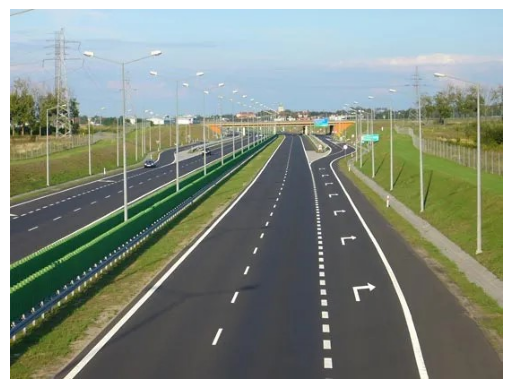

In [1]:
import matplotlib.pyplot as plt
import cv2

def read_image(file_name):
# Reading in the image
    image = cv2.imread(file_name)

    # Changing the color of image from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    return image

plt.axis('off')
plt.imshow(read_image('road.jpg'))



<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حال چون تصویر یک ماتریس سه بعدی هست (3 ماتریس دو بعدی که هر ماتریس بیانگر یکی از channel ها R,G,B هستند.) نیاز داریم تا تصویر را به یک ماتریس دو بعدی تبدیل کنیم که هر سطر بیانگر یک پیکسل هست و هر ستون بیانگر یکی از سه channel.
همچنین از آنجایی که مقادیر هر پیکسل عدد صحیح هست نیاز است تا نوع آن ها را نیز به <code>float</code> تغییر دهید.
</font>
</p>

In [2]:
def convert_to_2D(image):
        # تبدیل ابعاد تصویر از (m,n,3) به (m*n,3)
    reshaped_image = image.reshape(-1, 3)
    # تغییر نوع مقادیر به float
    reshaped_image = reshaped_image.astype(float)
    return reshaped_image


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در اینجا با استفاده از تابع kmeans خوشه بندی را انجام می‌دهیم و سپس بجای هرکدام از مقادیر پیکسل‌ها، مقدار centroid مربوط به خوشه‌اش را قرار می‌دهیم. پس از آن نتیجه حاصل را دوباره به یک ماتریس سه بعدی تبدیل می‌کنیم و در خروجی آن را نشان می‌دهیم.
(توجه کنید که مقادیر پیکسل ها را باید دوباره عدد صحیح کنید.)
</font>
</p>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
مقدار k را برابر 3 بگذارید. 
</font>
</p>

In [8]:
from sklearn.cluster import KMeans


def segmentation(image, k=3):
    reshaped_image = convert_to_2D(image)
    
    # اجرای K-Means
    kmeans = KMeans(n_clusters=k, random_state=42).fit(reshaped_image)
    centroids = kmeans.cluster_centers_
    labels = kmeans.labels_
    
    # تخصیص مقدار centroid به هر پیکسل و تبدیل به عدد صحیح
    segmented_image = centroids[labels].astype(int)
    
    # تبدیل مجدد به ماتریس سه‌بعدی
    segmented_image = segmented_image.reshape(image.shape)
    
    return segmented_image

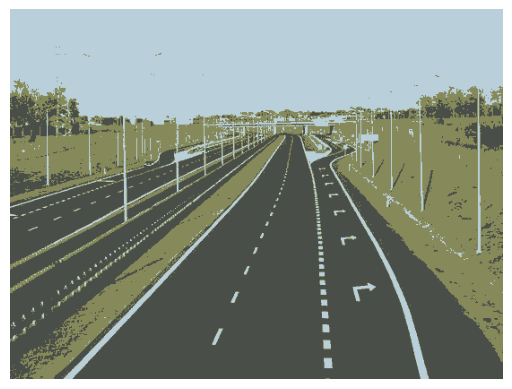

In [9]:
output = segmentation(read_image('road.jpg'))
plt.axis('off')
plt.imshow(output)


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با اجرای سلول زیر می‌توانید به مقایسه‌ی خروجی به ازای حالت های مختلف k بپردازید. در این بخش نیازی به تغییر کد ندارید.
</font>
</p>

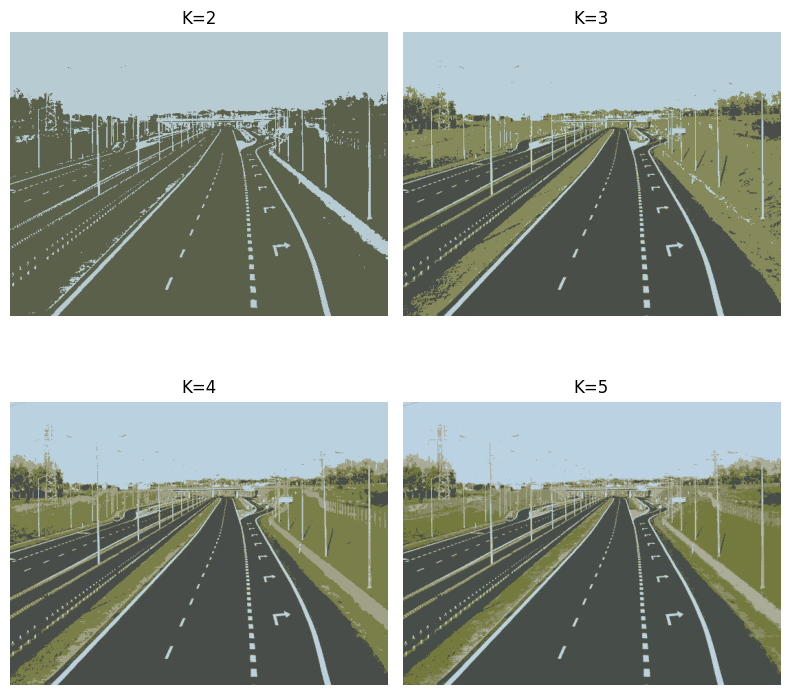

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
for i, ax in enumerate(axs.flat):
    ax.imshow(segmentation(read_image('road.jpg'),k=i+2))
    ax.set_title("K="+str(i+2))
    ax.axis('off') 
plt.tight_layout()
plt.show()